In [1]:
import random
from collections import defaultdict

def pct(x, total):
    return '%2.1f%%' % (100*float(x)/total)

x=[8,4,6,2]; a = [1]*x[0] + [2]*x[1] + [3]*x[2] + [4]*x[3]
x=[5,6,5,4]; b = [1]*x[0] + [2]*x[1] + [3]*x[2] + [4]*x[3]
x=[4,5,6,5]; c = [1]*x[0] + [2]*x[1] + [3]*x[2] + [4]*x[3]
x=[2,6,4,8]; d = [1]*x[0] + [2]*x[1] + [3]*x[2] + [4]*x[3]

cards = [
 {'Pro': False, 'Tmark': False, 'a': 1, 'b': 1, 'c': 1, 'd': 1, 'crit_fail': True},
 {'Pro': True,  'Tmark': False, 'a': 1, 'b': 2, 'c': 4, 'd': 1},
 {'Pro': False, 'Tmark': False, 'a': 1, 'b': 2, 'c': 3, 'd': 2},
 {'Pro': False, 'Tmark': False, 'a': 1, 'b': 4, 'c': 3, 'd': 4},
 {'Pro': False, 'Tmark': False, 'a': 2, 'b': 2, 'c': 3, 'd': 4},
 {'Pro': False, 'Tmark': False, 'a': 2, 'b': 3, 'c': 2, 'd': 3},
 {'Pro': False, 'Tmark': False, 'a': 1, 'b': 1, 'c': 2, 'd': 3},
 {'Pro': False, 'Tmark': False, 'a': 2, 'b': 1, 'c': 2, 'd': 3},
 {'Pro': True,  'Tmark': False, 'a': 2, 'b': 2, 'c': 1, 'd': 2},
 {'Pro': False, 'Tmark': False, 'a': 3, 'b': 1, 'c': 2, 'd': 2},
 {'Pro': False, 'Tmark': True, 'a': 4, 'b': 4, 'c': 4, 'd': 4, 'crit_win': True},
 {'Pro': False, 'Tmark': True, 'a': 1, 'b': 3, 'c': 3, 'd': 4},
 {'Pro': False, 'Tmark': True, 'a': 3, 'b': 3, 'c': 4, 'd': 2},
 {'Pro': True,  'Tmark': True, 'a': 3, 'b': 1, 'c': 3, 'd': 4},
 {'Pro': False, 'Tmark': True, 'a': 1, 'b': 2, 'c': 2, 'd': 4},
 {'Pro': True,  'Tmark': True, 'a': 3, 'b': 2, 'c': 1, 'd': 4},
 {'Pro': True,  'Tmark': True, 'a': 1, 'b': 4, 'c': 4, 'd': 2},
 {'Pro': False, 'Tmark': True, 'a': 3, 'b': 4, 'c': 3, 'd': 4},
 {'Pro': False, 'Tmark': True, 'a': 4, 'b': 3, 'c': 4, 'd': 2},
 {'Pro': False, 'Tmark': True, 'a': 3, 'b': 3, 'c': 1, 'd': 3},
]

def count_checks_in_suit(cards, suit):
    return sum(card[suit]-2 for card in cards if card[suit] >= 3)

def count_exes_in_suit(cards, suit):
    return sum(3-card[suit] for card in cards if card[suit] < 3)

blessing_cards = [
 {'Pro': False, 'Tmark': False, 'a': 3, 'b': 3, 'c': 3, 'd': 3, 'blessing': 'copper'},
 {'Pro': False, 'Tmark': False, 'a': 3, 'b': 3, 'c': 3, 'd': 3, 'blessing': 'copper'},
 {'Pro': False, 'Tmark': False, 'a': 3, 'b': 3, 'c': 3, 'd': 4, 'blessing': 'copper'},
 {'Pro': False, 'Tmark': False, 'a': 3, 'b': 3, 'c': 3, 'd': 4, 'blessing': 'copper'},
 {'Pro': False, 'Tmark': False, 'a': 4, 'b': 4, 'c': 4, 'd': 4, 'blessing': 'gold'},
 {'Pro': False, 'Tmark': False, 'a': 4, 'b': 4, 'c': 4, 'd': 4, 'blessing': 'gold'},
 {'Pro': False, 'Tmark': False, 'a': 4, 'b': 4, 'c': 4, 'd': 4, 'blessing': 'gold'},
 {'Pro': False, 'Tmark': False, 'a': 4, 'b': 4, 'c': 4, 'd': 4, 'blessing': 'gold'},
]


In [2]:
def flip(deck):
    # Takes a card off the deck and returns that new deck
    new_deck = deck[:]
    random.shuffle(new_deck)
    res = new_deck.pop()
    return res, new_deck

def flip_cards(cards, num=1):
    """
    Takes a card off the deck and returns that new deck

    Throws IndexError if there weren't eneough cards to flip
    """
    remaining = cards[:]
    random.shuffle(remaining)
    flipped = []
    for i in range(num):
        flipped.append(remaining.pop())
    return flipped, remaining

def one_flip(deck):
    return flip(deck)[0]

def two_flip(deck):
    a, deck = flip(deck)
    b, deck = flip(deck)
    return a, b

def three_flip(deck):
    a, deck = flip(deck)
    b, deck = flip(deck)
    c, deck = flip(deck)
    return a, b, c

def four_flip(deck):
    a, deck = flip(deck)
    b, deck = flip(deck)
    c, deck = flip(deck)
    d, deck = flip(deck)
    return a, b, c, d



In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
data = pd.DataFrame(cards)


In [56]:
def draw_dist(suit):
    g = sns.countplot(data=data, x=suit, palette='RdBu')
    g.axes.set_ylim(0,10)
    sns.despine()

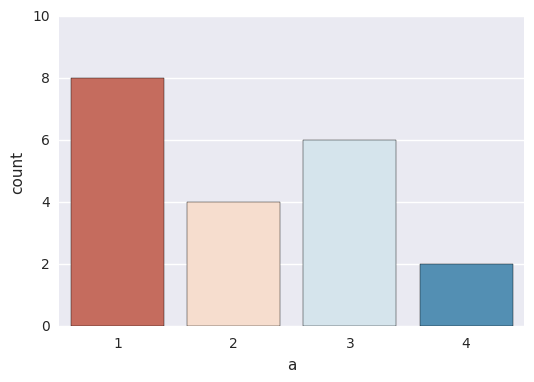

In [57]:
draw_dist('a')

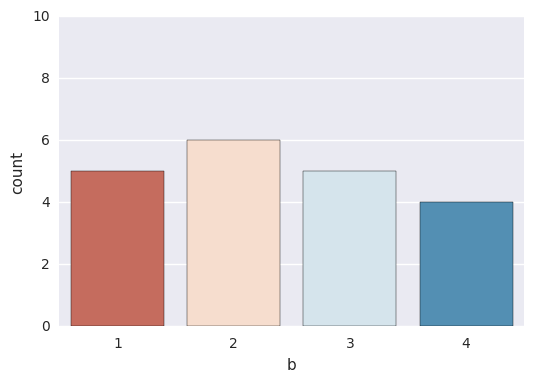

In [58]:
draw_dist('b')

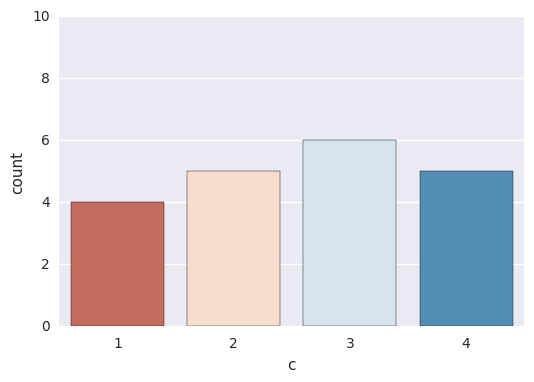

In [59]:
draw_dist('c')

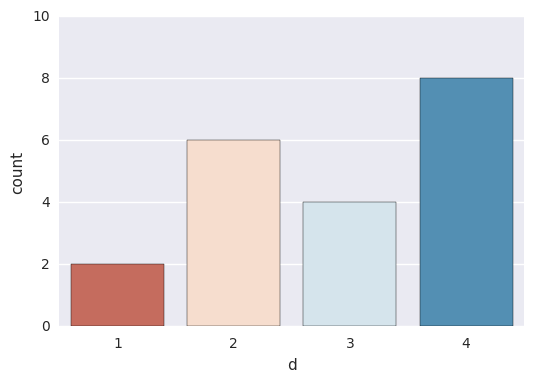

In [60]:
draw_dist('d')